# Morning Lecture

# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


In [19]:
pop = pd.read_excel('gapminder_population.xlsx', index_col=0)
pop = pop.sum()
pop.index = pop.index.astype(int)
logpop = np.log(pop)
logpop.dropna(inplace=True)

In [44]:
X = logpop.index.values.reshape(-1, 1)
y = logpop.values

In [45]:
# always do this with numpy arrays or even with DataFrames:
# X is a matrix (here with only one column, but there could be many)
#   mathematicians use capital letters for matrices
# X is the input data for our machine learning model
# X is also called the "independent variable(s)"
X.shape
# y is the thing we want to describe
# y is a vector (mathematicians use lowercase for vectors)
# y is the output of our model
y.shape

(81,)

In [46]:
# we want to describe:
#
# y = f(X)


In [47]:
m = LinearRegression() # create a model object (LinearRegressiion is a class)
m.fit(X, y)            # "trains" the model
                       # finds the best possible slope and intercept


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
xfuture = [[2020], [2030], [2040], [2050], [2100]] # we want to make a prediction of the population for these years
yfuture = m.predict(xfuture)
yfuture = np.exp(yfuture) / 1000_000_000 # we can put underscroll to read big numbers easier

In [49]:
print("slope    : ", m.coef_[0])    # every year the log pop goes up by 0.011
print("intercept: ", m.intercept_)  # in the year zero the log pop was 0.1774
print("R-squared: ", m.score(X, y)) # we can explain 95% of the population
for year, forecast in zip(xfuture, yfuture):
    print(f"population forecast for {year}: {forecast:5.1f} bln")

slope    :  0.01116937498463145
intercept:  0.1774210052035592
R-squared:  0.9485144752289157
population forecast for [2020]:   7.5 bln
population forecast for [2030]:   8.4 bln
population forecast for [2040]:   9.4 bln
population forecast for [2050]:  10.5 bln
population forecast for [2100]:  18.4 bln


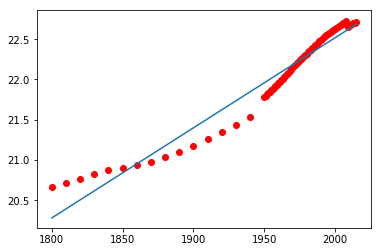

In [50]:
ypred = m.predict(X)
plt.scatter(X, y, c='red')
plt.plot(X, ypred)
plt.show()


slope    :  0.015356567018111007
intercept:  -8.116615270449834
R-squared:  0.9762766054658274
population forecast for [2020]:   8.8 bln
population forecast for [2030]:  10.3 bln


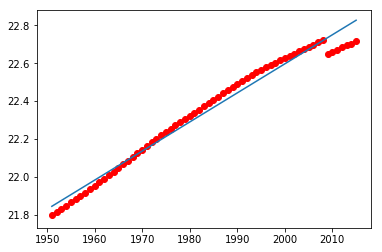

In [51]:
# Prediction of 2020 and 2030 with the data only after 1950

X = logpop.index.values.reshape(-1, 1)
y = logpop.values
X = X[-65:]
y = y[-65:]
m = LinearRegression() # create a model object (LinearRegressiion is a class)
m.fit(X, y)            # "trains" the model
                       # finds the best possible slope and intercept
xfuture = [[2020], [2030]] # we want to make a prediction of the population for these years
yfuture = m.predict(xfuture)
yfuture = np.exp(yfuture) / 1000_000_000 # we can put underscroll to read big numbers easier
print("slope    : ", m.coef_[0])    # every year the log pop goes up by 0.011
print("intercept: ", m.intercept_)  # in the year zero the log pop was 0.1774
print("R-squared: ", m.score(X, y)) # we can explain 95% of the population
for year, forecast in zip(xfuture, yfuture):
    print(f"population forecast for {year}: {forecast:5.1f} bln")
ypred = m.predict(X)
plt.scatter(X, y, c='red')
plt.plot(X, ypred)
plt.show()

# Afternoon Lecture

Data Structures Recap: Dictionaries